The following generates results using the bayes object 

In [1]:
from bayesprob import *
from copy import copy



In [2]:
#The following will map Figure 1 given three objects
def fig1(a1,a2,a3):
    out1,out2,out3=frame(),frame(),frame()
    P=np.linspace(.01,.99,100)
    for i in P:
        a1.p,a2.p,a3.p=i,i,i
        out1=pd.concat([out1,a1.expost()])
        out2=pd.concat([out2,a2.expost()])
        out3=pd.concat([out3,a3.expost()])

    #Do some relabeling
    c=list(out1.columns)

    c1,c2,c3=copy(c),copy(c),copy(c)
    c1[0]+=''+ ': $θ$' + '=' +str(0)
    c2[0]+=''+ ': $θ$' + '=' +str(0.5)
    c3[0]+=''+ ': $θ$' + '=' +str(1)


    c1[5]+=''+ ': $θ$' + '=' +str(0)
    c2[5]+=''+ ': $θ$' + '=' +str(0.5)
    c3[5]+=''+ ': $θ$' + '=' +str(1)


    out1.columns=c1
    out2.columns=c2
    out3.columns=c3


    out1.index,out2.index,out3.index=P,P,P   
    out1.index.name=r'$π_{s}$'

    fig,ax=plt.subplots(1,2)
    settings=r'$λ_0$' +'='+ str(a1.lamda_0)+' , '  +r'$a_{0}$'+'='+ str(a1.a_0)+' , ' + r'$a_{r}$'+'='+ str(a1.a_r)
    fig.suptitle(settings, y=1.1, fontsize=18  )
    c=out1.columns
    out1[[c1[0]]].plot(grid=True,ax=ax[0])
    out1[[c1[5]]].plot(grid=True,ax=ax[1])
    out2[[c2[0]]].plot(grid=True,ax=ax[0])
    out2[[c2[5]]].plot(grid=True,ax=ax[1])
    out3[[c3[0]]].plot(grid=True,ax=ax[0])
    out3[[c3[5]]].plot(grid=True,ax=ax[1])

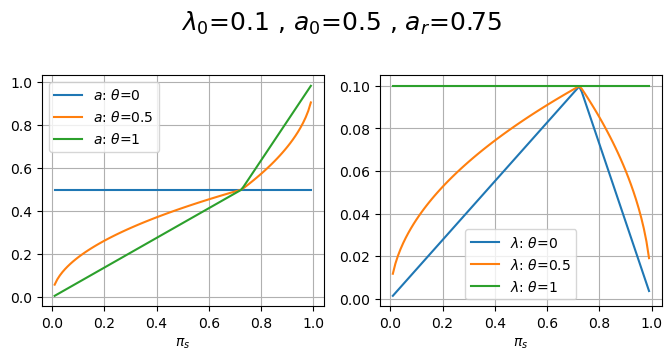

In [3]:
#Create the three objects you want to map
#For this graph only the theta and phi should differ across the objects

a1=bayes(n_0=2,a_0=1/2,lamda_0=.1,theta=0,phi=1,delta=[.5,0],n_r=2,a_r=0.75)
a2=copy(a1); a2.theta=0.5; a2.phi=1
a3=copy(a1); a3.theta=1; a3.phi=1 

pltsize(3,8)
fig=fig1(a1,a2,a3)
#plt.savefig(direcout+'Fig1'+'.png',bbox_inches='tight')